Helpers

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False,**kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin,xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

Here are helper functions to plot volume or flow rate vs.time with correct labels.

In [5]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)",xlabel="volum (bbl)",axes=axes, **kwargs)
    
def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)",axes=axes, **kwargs)

In [6]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)",xlabel="volum (bbl)",axes=axes, **kwargs)
    
def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)",axes=axes, **kwargs)

# Chapter 08 Understanding Rates of Change

## 8.1 Calculating average flow rates from volumes

In [7]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

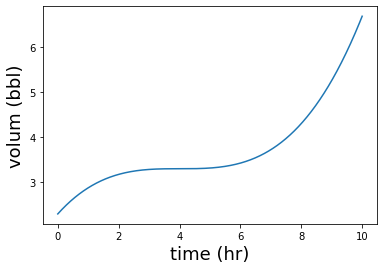

In [8]:
plot_volume(volume,0,10)

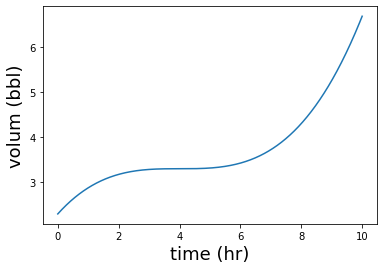

In [9]:
plot_volume(volume,0,10)

### 8.1.1 Implementing an average_flow_rate function

In [10]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2-t1)

In [11]:
volume(4)

3.3

In [12]:
volume(9)

5.253125

In [13]:
average_flow_rate(volume,4,9)

0.390625

### 8.1.2 Picturing the average flow rate with a secant line

### 8.1.3 Negative rates of change

In [14]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

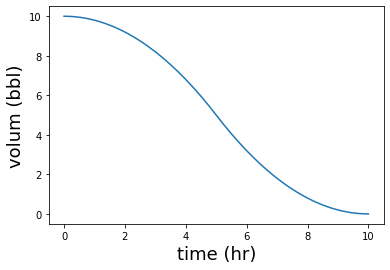

In [15]:
plot_volume(decreasing_volume,0,10)

In [16]:
average_flow_rate(decreasing_volume,0,4)

-0.8

### 8.1.4 Exercises

In [17]:
(77905-77641) / 4.5

58.666666666666664

In [18]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

In [19]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

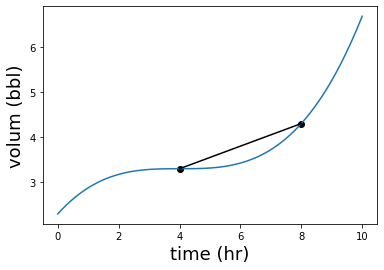

In [20]:
plot_volume(volume,0,10)
plot_secant(volume,4,8)

## 8.2 Plotting the average flow rate over time

### 8.2.1 Finding the average flow rate in different time intervals

In [21]:
import numpy as np
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [22]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt)) #A For every interval start time t, find the average flow rate from t to t+de. We want the list of pairs of t with the corresponding rate.
            for t in np.arange(t1,t2,dt)] #

In [23]:
interval_flow_rates(volume,0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

### 8.2.2 Plotting the interval flow rates alogside the flow rate function

In [24]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)

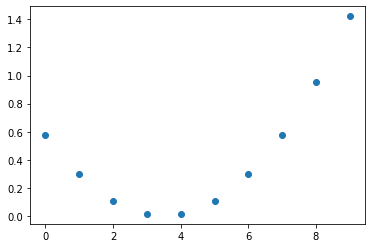

In [25]:
plot_interval_flow_rates(volume,0,10,1)

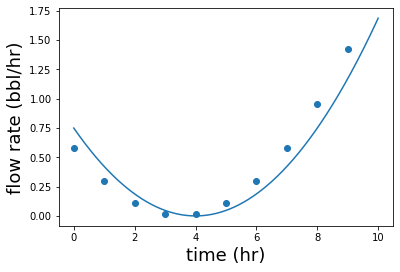

In [26]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1)

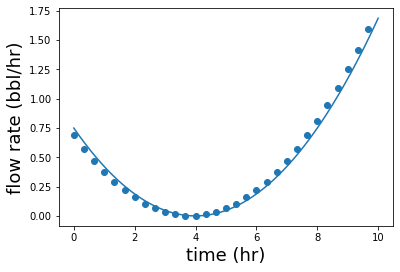

In [27]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)

### 8.2.3 Exercises

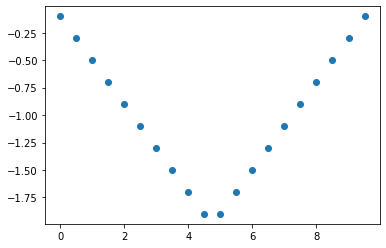

In [28]:
plot_interval_flow_rates(decreasing_volume,0,10,0.5)

In [29]:
def linear_volume_function(t):
    return 5*t + 3

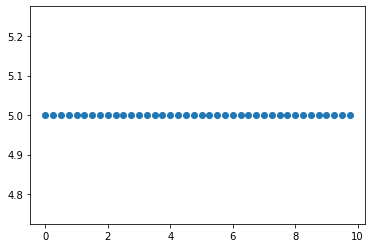

In [30]:
plot_interval_flow_rates(linear_volume_function,0,10,0.25)

## 8.3 Approximating instantaneous flow rates

### 8.3.1 Finding the slope of very small secant lines

In [31]:
average_flow_rate(volume,0.5,1.5)

0.42578125

In [32]:
average_flow_rate(volume,0.9,1.1)

0.4220312499999988

In [33]:
average_flow_rate(volume,0.99,1.01)

0.42187656249998945

In [34]:
average_flow_rate(volume,0.999,1.001)

0.42187501562509583

In [35]:
average_flow_rate(volume,0.9999,1.0001)

0.42187500015393936

In [36]:
average_flow_rate(volume,0.99999,1.00001)

0.4218750000002602

In [37]:
flow_rate(1)

0.421875

### 8.3.2 Building the instantaneous flow rate function

In [38]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits) #A
    h = 1
    approx = average_flow_rate(v,t-h,t+h) #B
    for i in range(0,2*digits): #C
        h = h/10
        next_approx = average_flow_rate(v,t-h,t+h) #D
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits) #E
        else:
            approx = next_approx #F
    raise Exception("Derivative did not converge") #G

In [39]:
instantaneous_flow_rate(volume,1)

0.421875

### 8.3.3 Currying and plotting the instantaneous flow rate funcation

In [40]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume,t)
    return flow_rate_function

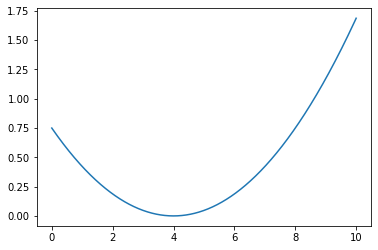

In [41]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

### 8.3.4 Exercises

In [42]:
volume(1)

2.878125

In [43]:
secant_line(volume,0.999,1.001)(1)

2.8781248593749997

In [44]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [45]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [46]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [47]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

In [48]:
def sign(x):
    return x / abs(x)

In [49]:
average_flow_rate(sign,-0.1,0.1)

10.0

In [50]:
average_flow_rate(sign,-0.01,0.01)

100.0

In [51]:
average_flow_rate(sign,-0.001,0.001)

1000.0

In [52]:
average_flow_rate(sign,-0.0001,0.0001)

10000.0

## 8.4 Approximating the change in volume

### 8.4.1 Finding the change in volume on a short time interval

In [53]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [54]:
small_volume_change(flow_rate,2,1)

0.1875

In [55]:
volume(3) - volume(2)

0.109375

In [56]:
small_volume_change(flow_rate,2,0.01)

0.001875

In [57]:
volume(2.01) - volume(2)

0.0018656406250001645

### 8.4.2 Breaking up time into small intervals

In [58]:
def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
               for t in np.arange(t1,t2,dt))

In [59]:
volume_change(flow_rate,0,10,0.1)

4.32890625

In [61]:
volume(10) - volume(0)

4.375

In [62]:
volume_change(flow_rate,0,10,0.0001)

4.3749531257812455

### 8.4.3 Picturing the volume change on the flow rate graph

### 8.4.4 Exercise

In [63]:
volume_change(flow_rate,0,6,0.01)

1.1278171874999996

In [64]:
volume_change(flow_rate,6,10,0.01)

3.2425031249999257